In [1]:
import pandas as pd
import numpy as np
from  pandas_profiling import ProfileReport
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , roc_auc_score , roc_curve

In [2]:
df=pd.read_csv("winequality_red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
x=df.drop(columns=['quality'])

In [5]:
y=df.quality

In [6]:
from sklearn.ensemble import BaggingClassifier

In [7]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [8]:
bag_dt=BaggingClassifier(DecisionTreeClassifier(),n_estimators=100)

In [9]:
bag_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [10]:
bag_dt.predict(x_test)

array([6, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 7, 5, 5, 6, 6, 5,
       6, 7, 5, 5, 5, 7, 5, 6, 6, 6, 6, 5, 7, 7, 5, 6, 6, 6, 5, 7, 6, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 7, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 6, 5, 7, 6, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 8, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 5, 7, 7, 5, 5, 6, 7, 6, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 8, 6, 5, 5, 6, 7, 5, 5,
       6, 6, 6, 6, 6, 6, 5, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 5, 6,
       7, 7, 7, 5, 5, 7, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5,
       6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7, 5, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7, 5, 6, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6,

In [11]:
bag_dt.base_estimator

DecisionTreeClassifier()

In [12]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [13]:
bag_dt.estimator_params

()

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
bag_knn=BaggingClassifier(KNeighborsClassifier(6),n_estimators=10)

In [16]:
bag_knn.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

In [17]:
bag_knn.predict(x_test)

array([5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 7, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 5,
       6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 7, 5, 5, 6, 6, 5, 6, 5,
       5, 5, 7, 7, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 4, 6, 6, 5, 5, 5,
       6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 7, 5, 6, 6, 6, 5, 6, 6, 6, 5,
       6, 5, 6, 5, 5, 7, 5, 7, 7, 6, 5, 7, 6, 5, 7, 6, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 6, 7, 6, 6, 5, 5, 6, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 7, 7, 5,
       5, 7, 6, 5, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5,
       5, 5, 7, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 7, 6, 7, 6, 7, 7, 6, 5,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 7, 5, 6, 7, 6, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6,

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf=RandomForestClassifier(n_estimators=5)

In [20]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [21]:
rf.score(x_test,y_test)

0.6675

In [22]:
bag_dt.score(x_test,y_test)

0.6975

In [23]:
bag_knn.score(x_test,y_test)

0.48

In [24]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1166517259),
 DecisionTreeClassifier(max_features='auto', random_state=318313851),
 DecisionTreeClassifier(max_features='auto', random_state=1018970647),
 DecisionTreeClassifier(max_features='auto', random_state=777799673),
 DecisionTreeClassifier(max_features='auto', random_state=1709504823)]

In [25]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1166517259)

In [29]:
from sklearn import tree
import sklearn
import matplotlib.pyplot as plt
%matplotlib in line

UsageError: unrecognized arguments: line


[Text(558.7170560747664, 1058.5894736842106, 'X[10] <= 10.35\ngini = 0.643\nsamples = 767\nvalue = [10, 45, 495, 495, 146, 8]'),
 Text(146.19795560747664, 1001.3684210526317, 'X[9] <= 0.535\ngini = 0.547\nsamples = 425\nvalue = [7, 32, 403, 212, 23, 2]'),
 Text(32.07196261682243, 944.1473684210526, 'X[1] <= 1.082\ngini = 0.385\nsamples = 114\nvalue = [3, 18, 144, 21, 1, 0]'),
 Text(27.900000000000002, 886.9263157894737, 'X[6] <= 10.5\ngini = 0.368\nsamples = 113\nvalue = [3, 15, 144, 21, 1, 0]'),
 Text(23.728037383177572, 829.7052631578947, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 3, 0, 0]'),
 Text(32.07196261682243, 829.7052631578947, 'X[10] <= 9.075\ngini = 0.35\nsamples = 112\nvalue = [3, 15, 144, 18, 1, 0]'),
 Text(16.68785046728972, 772.4842105263158, 'X[8] <= 3.335\ngini = 0.625\nsamples = 4\nvalue = [0, 2, 1, 1, 0, 0]'),
 Text(12.51588785046729, 715.2631578947369, 'X[5] <= 13.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1, 0, 0]'),
 Text(8.34392523364486, 658.042105263158, '

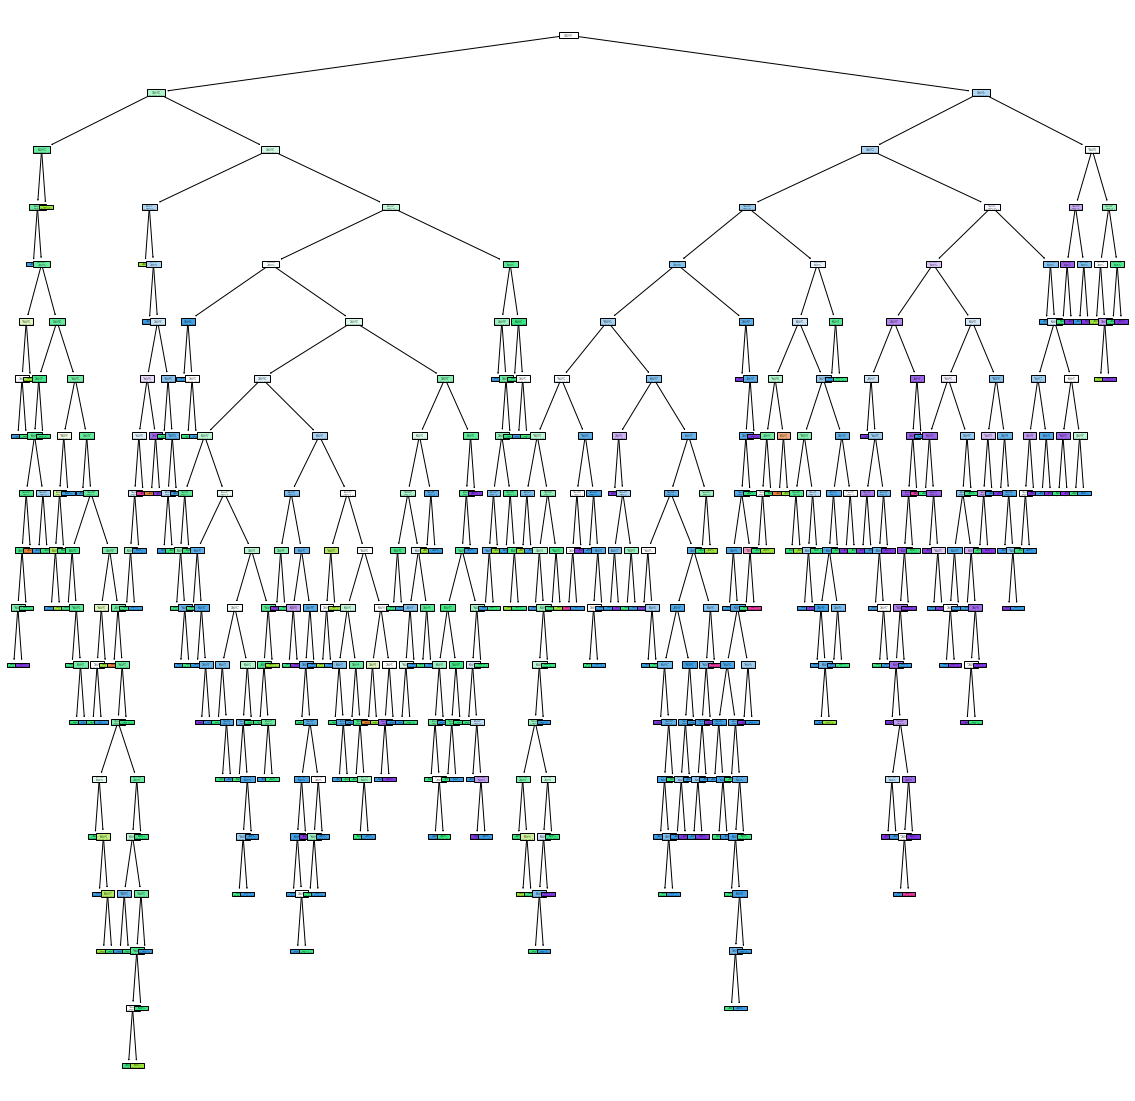

In [30]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0],filled=True)

[Text(620.2320865664403, 1060.02, 'X[4] <= 0.076\ngini = 0.634\nsamples = 742\nvalue = [9, 39, 517, 490, 133, 11]'),
 Text(356.90215809893306, 1005.6600000000001, 'X[0] <= 8.15\ngini = 0.664\nsamples = 281\nvalue = [2, 17, 143, 199, 78, 6]'),
 Text(262.5603782735208, 951.3000000000001, 'X[10] <= 11.75\ngini = 0.632\nsamples = 177\nvalue = [2, 11, 110, 123, 29, 2]'),
 Text(183.06838021338504, 896.94, 'X[8] <= 3.395\ngini = 0.619\nsamples = 147\nvalue = [2, 10, 105, 95, 19, 1]'),
 Text(105.26770126091172, 842.58, 'X[1] <= 0.56\ngini = 0.584\nsamples = 79\nvalue = [2, 5, 69, 42, 7, 1]'),
 Text(67.65276430649854, 788.22, 'X[1] <= 0.415\ngini = 0.623\nsamples = 49\nvalue = [0, 4, 30, 35, 6, 1]'),
 Text(36.80310378273521, 733.8600000000001, 'X[10] <= 9.55\ngini = 0.697\nsamples = 21\nvalue = [0, 2, 13, 9, 6, 1]'),
 Text(32.4733268671193, 679.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 9, 0, 0, 0]'),
 Text(41.13288069835111, 679.5, 'X[4] <= 0.067\ngini = 0.715\nsamples = 17\nvalue = [0, 2, 4,

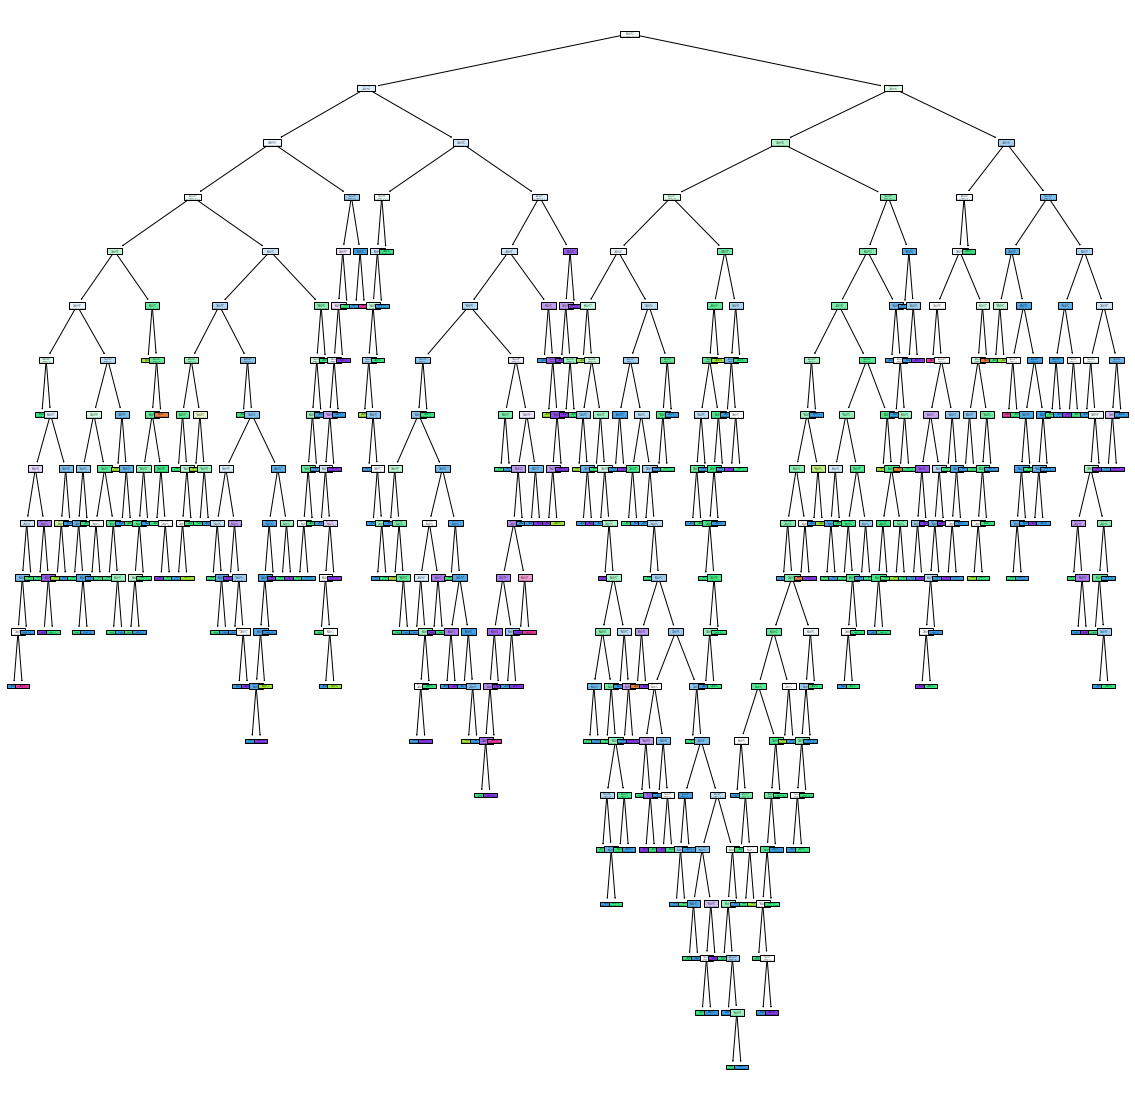

In [31]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[1],filled=True)

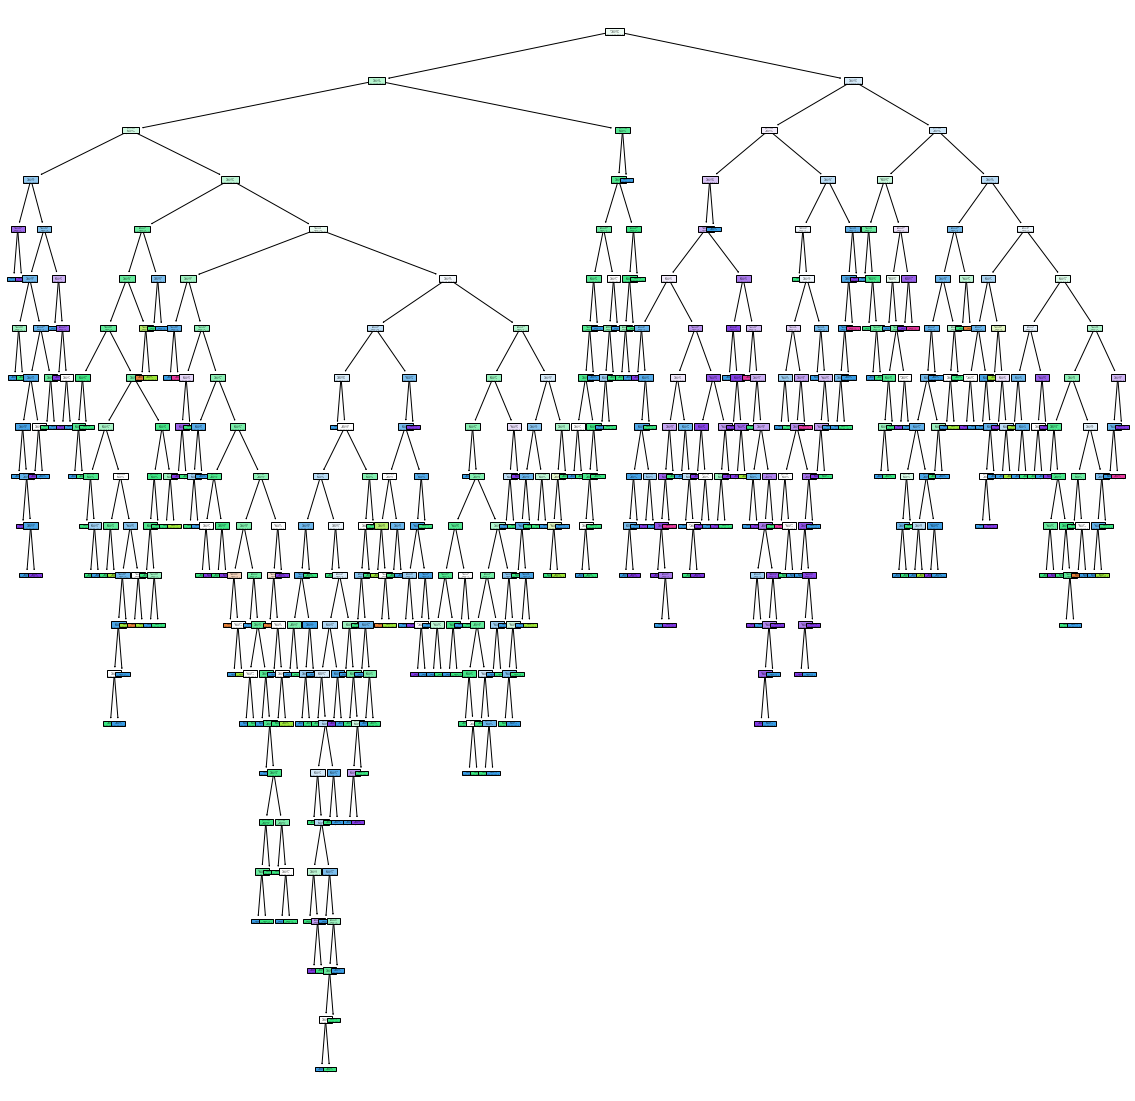

In [32]:
plt.figure(figsize=(20,20))
for i in range(len(rf.estimators_)):
    tree.plot_tree(rf.estimators_[i],filled=True)

In [35]:
grid_parm={
    'n_estimators':[5,10,50,100,120,150],
    'criterion':['gini','entorpy'],
    'max_depth':range(10),
    'min_samples_leaf':range(10)
}

In [34]:
rf=RandomForestClassifier(n_estimators=5)

In [38]:
grid_search_rf=GridSearchCV(param_grid=grid_parm,cv=10,n_jobs=6,verbose=1,estimator=rf)

In [39]:
grid_search_rf.fit(x_train,y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


C:\Users\Ast_Rishabh\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Ast_Rishabh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=6,
             param_grid={'criterion': ['gini', 'entorpy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 50, 100, 120, 150]},
             verbose=1)

In [40]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 120}

In [41]:
rf_new=RandomForestClassifier(criterion='gini',max_depth=9,min_samples_leaf=1,n_estimators=120)

In [42]:
rf_new.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, n_estimators=120)

In [43]:
rf_new.score(x_test,y_test)

0.6675

In [ ]:
plt.figure(figsize = (20,20))
tree.plot_tree(rf_new.estimators_[0] , filled = True )

[Text(429.04639175257734, 1032.8400000000001, 'X[9] <= 0.555\ngini = 0.643\nsamples = 738\nvalue = [6, 37, 523, 461, 161, 11]'),
 Text(137.34278350515464, 924.1200000000001, 'X[1] <= 0.395\ngini = 0.468\nsamples = 210\nvalue = [5, 12, 237, 73, 14, 0]'),
 Text(30.68041237113402, 815.4000000000001, 'X[10] <= 9.6\ngini = 0.606\nsamples = 33\nvalue = [0, 0, 14, 27, 10, 0]'),
 Text(15.34020618556701, 706.6800000000001, 'X[9] <= 0.52\ngini = 0.231\nsamples = 10\nvalue = [0, 0, 13, 2, 0, 0]'),
 Text(7.670103092783505, 597.96, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 13, 0, 0, 0]'),
 Text(23.010309278350515, 597.96, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0]'),
 Text(46.02061855670103, 706.6800000000001, 'X[7] <= 0.995\ngini = 0.44\nsamples = 23\nvalue = [0, 0, 1, 25, 10, 0]'),
 Text(38.350515463917525, 597.96, 'X[4] <= 0.049\ngini = 0.545\nsamples = 13\nvalue = [0, 0, 1, 9, 10, 0]'),
 Text(23.010309278350515, 489.24, 'X[9] <= 0.415\ngini = 0.346\nsamples = 5\nvalue = [0, 0, 0, 7, 2,